In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset: created from `Carbon Footprint of Textile and Clothing Products` and others data

In [2]:
fabriccomparison_df = pd.read_csv("data/fabrics-comparison.csv")

fabriccomparison_df

,fabric,type,co2_emissions (kg/kg Fiber),energy_consumption (kW h/kg Fiber),water_use (kg/kg fabric)
0,Nylon,synthetic,37,69,465
1,Acrylic,synthetic,26,49,210
2,Polyester,synthetic,19,35,20
3,Polypropylene,synthetic,17,32,70
4,Viscose,synthetic,15,28,390
5,Cotton,natural,8,15,1850
6,Wool,natural,7,13,10
7,Hemp,natural,3,5,210


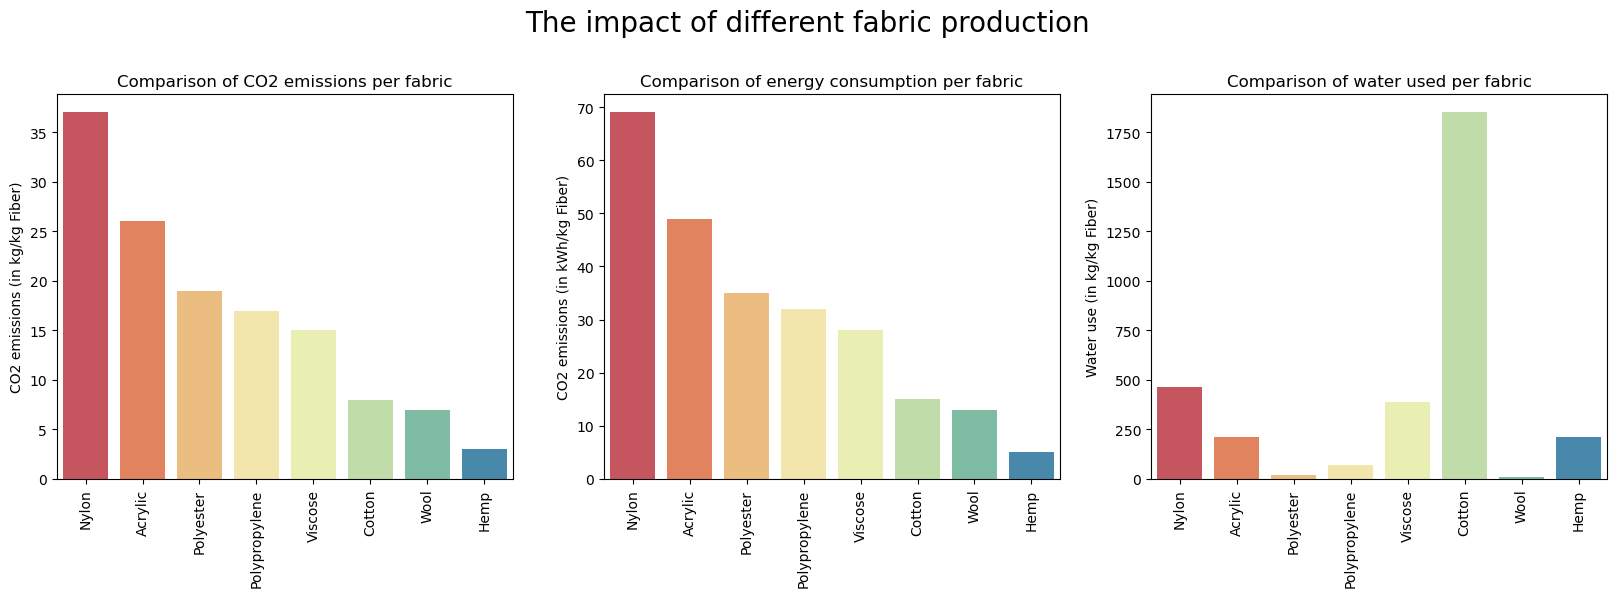

In [3]:
#fabriccomparison_changed_df = pd.melt(fabriccomparison_df.drop(columns=['type']), id_vars="fabric", var_name="all_consumption", value_name="value")

fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=False, sharey=False)
palette = "Spectral"

sns.barplot(ax=axes[0], data=fabriccomparison_df, x='fabric', y='co2_emissions (kg/kg Fiber)', palette=palette)
axes[0].set_title('Comparison of CO2 emissions per fabric')
axes[0].set_xlabel('')
axes[0].set_ylabel('CO2 emissions (in kg/kg Fiber)')
axes[0].set_xticklabels(fabriccomparison_df.fabric, rotation=90)

sns.barplot(ax=axes[1], data=fabriccomparison_df, x='fabric', y='energy_consumption (kW h/kg Fiber)', palette=palette)
axes[1].set_title('Comparison of energy consumption per fabric')
axes[1].set_xlabel('')
axes[1].set_ylabel('CO2 emissions (in kWh/kg Fiber)')
axes[1].set_xticklabels(fabriccomparison_df.fabric, rotation=90)

sns.barplot(ax=axes[2], data=fabriccomparison_df, x='fabric', y='water_use (kg/kg fabric)', palette=palette)
axes[2].set_title('Comparison of water used per fabric')
axes[2].set_xlabel('')
axes[2].set_ylabel('Water use (in kg/kg Fiber)')
axes[2].set_xticklabels(fabriccomparison_df.fabric, rotation=90)

plt.suptitle('The impact of different fabric production', fontsize=20,y=1.05)
plt.show()

## Dataset: `Plastic based Textiles in clothing industry`

In [4]:
df = pd.read_csv("data/Plastic based Textiles in clothing industry.csv")

df

,Company,Product_Type,Production_Year,Greenhouse_Gas_Emissions,Pollutants_Emitted,Water_Consumption,Energy_Consumption,Waste_Generation,Sales_Revenue
0,Zara,Polyester,2020,5000,20,7500,1200,300,500000
1,Zara,Nylon,2019,3000,15,5000,900,200,450000
2,Zara,Recycled_Poly,2021,3500,18,6000,1100,250,480000
3,Zara,Cotton,2018,2000,10,4500,800,180,550000
4,Zara,Synthetic_Blend,2022,6000,25,8000,1500,350,600000
...,...,...,...,...,...,...,...,...,...
6951,Adidas,Tencel,2018,3218,21,7536,902,192,523173
6952,Urban Outfitters,Microfiber,2019,2622,11,5267,952,170,436096
6953,Urban Outfitters,Organic_Cotton,2019,5920,24,4321,982,177,489765
6954,Adidas,Microfiber,2020,2897,16,4125,1085,321,487443


In [5]:
all_companies = df.Company.unique()
print(f"There are {len(all_companies)} companies: {all_companies}")

all_years = df.sort_values(by='Production_Year').Production_Year.unique()
print(f"Spread out over {len(all_years)} years: {all_years}")

There are 5 companies: ['Zara' 'Adidas' 'Forever 21' 'Urban Outfitters' 'Nike']
Spread out over 5 years: [2018 2019 2020 2021 2022]


In [6]:
df.groupby('Company').agg({
    'Product_Type' : ['nunique'],
    'Greenhouse_Gas_Emissions' : ['sum'],
    'Pollutants_Emitted' : ['sum'],
    'Water_Consumption' : ['sum'],
    'Energy_Consumption' : ['sum'],
    'Waste_Generation' : ['sum'],
    'Sales_Revenue' : ['sum']
    })

,Product_Type,Greenhouse_Gas_Emissions,Pollutants_Emitted,Water_Consumption,Energy_Consumption,Waste_Generation,Sales_Revenue
,nunique,sum,sum,sum,sum,sum,sum
Company,,,,,,,
Adidas,11,5398561,23096,8144954,1520380,345775,699566774
Forever 21,11,5293637,22881,8064359,1497468,336146,689964263
Nike,11,5622829,24794,8677384,1606703,358839,737088156
Urban Outfitters,11,5373217,23719,8357986,1526717,345631,710050520
Zara,11,5379307,23712,8379830,1545930,344900,712523829


In [7]:
product_type_info = df.groupby('Product_Type').agg({
    'Company' : ['nunique'],
    'Greenhouse_Gas_Emissions' : ['sum'],
    'Pollutants_Emitted' : ['sum'],
    'Water_Consumption' : ['sum'],
    'Energy_Consumption' : ['sum'],
    'Waste_Generation' : ['sum'],
    'Sales_Revenue' : ['sum']
    })

product_type_info

,Company,Greenhouse_Gas_Emissions,Pollutants_Emitted,Water_Consumption,Energy_Consumption,Waste_Generation,Sales_Revenue
,nunique,sum,sum,sum,sum,sum,sum
Product_Type,,,,,,,
Cotton,5,2417365,10496,3636368,677462,154098,314224128
Linen,5,2639911,11699,4058802,760197,169141,348922471
Microfiber,5,2530315,11078,3926062,713882,163308,331210557
Nylon,5,2471469,10802,3822366,705878,159496,323141583
Organic_Cotton,5,2604502,11449,4034172,742718,168898,343069881
Polyester,5,2595226,11284,3985025,736864,165035,341159309
Recycled_Poly,5,2389269,10826,3729576,700929,158447,321160499
Synthetic_Blend,5,2365048,9676,3515378,648776,144425,298031021


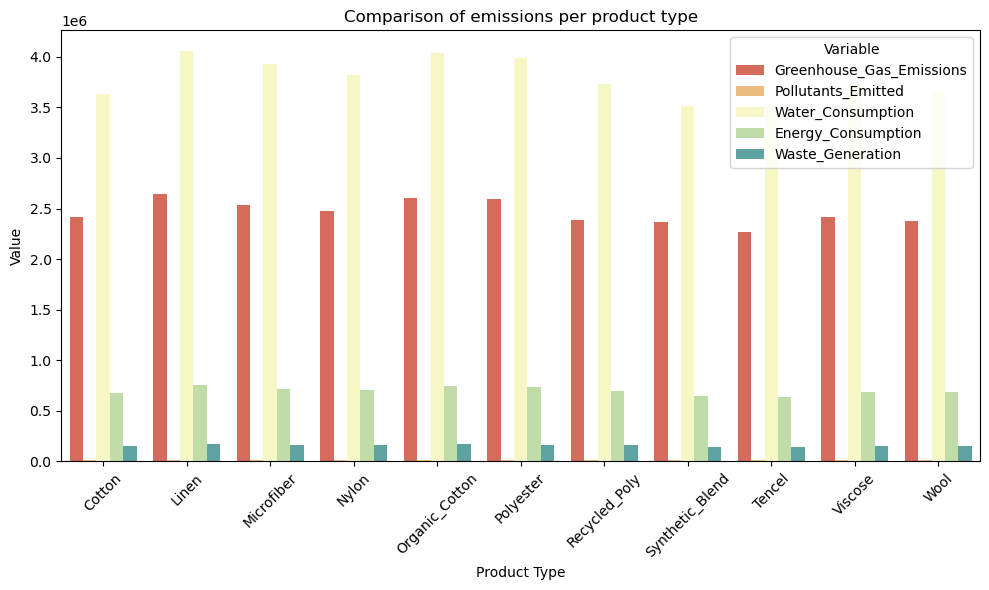

In [8]:
product_type_info_melted = product_type_info.drop(columns=[('Sales_Revenue', 'sum'), ('Company', 'nunique')]).reset_index().melt(id_vars='Product_Type', var_name='Variable', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Type', y='Value', hue='Variable', data=product_type_info_melted, palette="Spectral")
plt.xlabel('Product Type')
plt.ylabel('Value')
plt.title('Comparison of emissions per product type')
plt.legend(title='Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Dataset: `Environmental Performance of UK Fashion Brands`

In [9]:
df2 = pd.read_excel("data/Environmental Performance of UK Fashion Brands.xlsx")

df2 = df2.set_index('Brand')

df2

,Sourcing sustainable materials (%),Ethical labor practices (1-5),Responsible production processes (1-5),Eco-efficient distribution and logistics practices (1-5),Carbon emissions (kg CO2e per ton of product),Water use (m3 per ton of product),Waste generation (kg per ton of product),Environmental performance score (0-100)
Brand,,,,,,,,
ASOS,65,4,4,4,5.5,18,4,82
Boohoo,50,3,3,3,6.0,20,5,75
Next,70,4,4,4,5.0,16,3,86
M&S,80,5,5,5,4.0,14,2,93
Primark,45,3,3,3,6.5,22,5,72
...,...,...,...,...,...,...,...,...
Hobbs,70,4,4,4,5.0,16,3,86
Holland & Barrett,65,4,4,4,5.5,18,4,82
House of Fraser,50,3,3,3,6.0,20,5,75


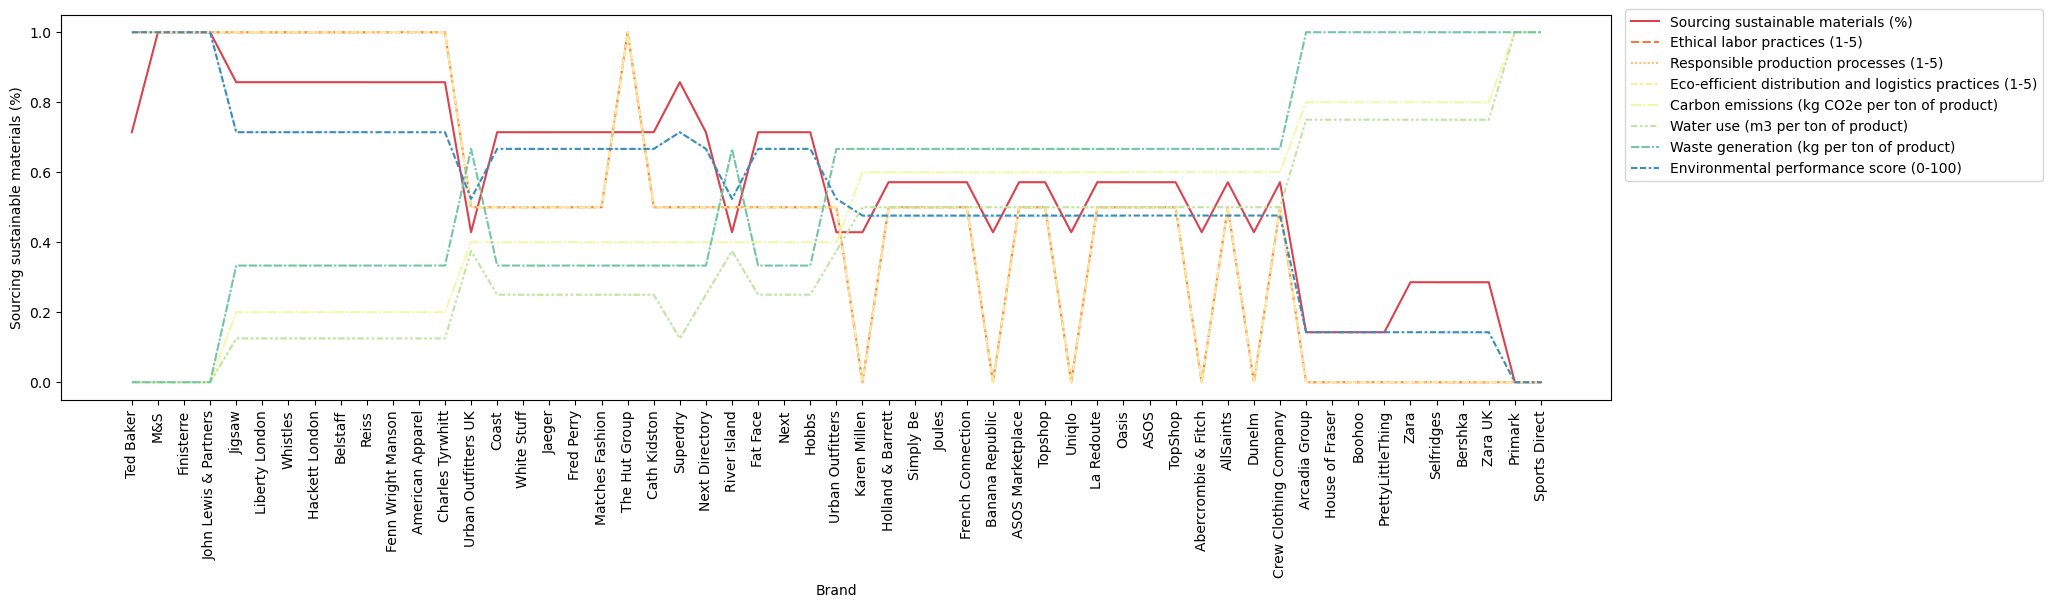

In [11]:
normalized_df2=(df2-df2.min())/(df2.max()-df2.min())

plt.figure(figsize=(20, 5))
sns.lineplot(data=normalized_df2.sort_values(by='Carbon emissions (kg CO2e per ton of product)'), palette="Spectral")
plt.legend(bbox_to_anchor=(1, 1.05), loc=2, borderaxespad=1.)
plt.xlabel('Brand')
plt.ylabel('Sourcing sustainable materials (%)')
plt.xticks(rotation=90)
plt.show()